In [217]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [218]:
test = pd.read_csv('2019.csv')
test.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [219]:
train = pd.read_csv('2018.csv').interpolate(method ='linear', limit_direction ='forward')
train.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [220]:
data_2017 = pd.read_csv('2017.csv')
train.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [221]:
data_2016 = pd.read_csv('2016.csv')
train.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [222]:
data_2015 = pd.read_csv('2015.csv')
train.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

There is one missing value in 2018 table, I used the interpolate() method to predict the missing value.

In [223]:
mean_2015 = data_2015['Happiness Score'].mean()
median_2015 = data_2015['Happiness Score'].median()
print('2015 Happiness Score: mean: ' + str(mean_2015) + ', median ' + str(median_2015))

2015 Happiness Score: mean: 5.3757341772151905, median 5.2325


In [224]:
mean_2016 = data_2016['Happiness Score'].mean()
median_2016 = data_2016['Happiness Score'].median()
print('2016 Happiness Score: mean: ' + str(mean_2016) + ', median ' + str(median_2016))

2016 Happiness Score: mean: 5.382184713375795, median 5.314


In [225]:
mean_2017 = data_2017['Happiness.Score'].mean()
median_2017 = data_2017['Happiness.Score'].median()
print('2017 Happiness Score: mean: ' + str(mean_2017) + ', median ' + str(median_2017))

2017 Happiness Score: mean: 5.354019355773926, median 5.27899980545044


In [226]:
mean_2018 = train['Score'].mean()
median_2018 = train['Score'].median()
print('2018 Happiness Score: mean: ' + str(mean_2018) + ', median ' + str(median_2018))

2018 Happiness Score: mean: 5.375916666666668, median 5.378


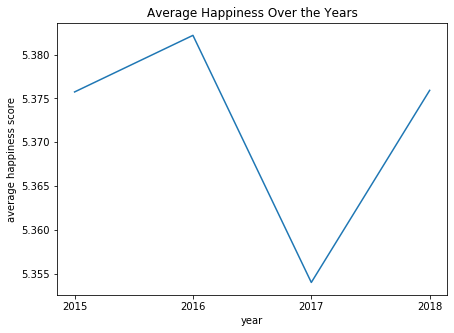

In [227]:
mean = pd.DataFrame({'year': [2015, 2016, 2017, 2018],
                     'mean': [mean_2015, mean_2016, mean_2017, mean_2018]})
plt.figure(figsize=[7, 5])
plt.plot(mean['year'], mean['mean'])
plt.xticks([2015, 2016, 2017, 2018])
plt.ylabel('average happiness score')
plt.xlabel('year')
plt.title('Average Happiness Over the Years')
plt.show()

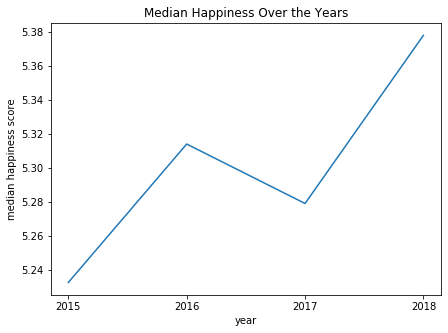

In [228]:
median = pd.DataFrame({'year': [2015, 2016, 2017, 2018],
                     'median': [median_2015, median_2016, median_2017, median_2018]})
plt.figure(figsize=[7, 5])
plt.plot(mean['year'], median['median'])
plt.xticks([2015, 2016, 2017, 2018])
plt.ylabel('median happiness score')
plt.xlabel('year')
plt.title('Median Happiness Over the Years')
plt.show()

The central tendencies of happiness score are increasing in general.

In [229]:
rank = data_2015[['Country', 'Happiness Rank']].merge(data_2016[['Country', 'Happiness Rank']]
                                                      , left_on='Country', right_on='Country')
rank = rank.merge(data_2017[['Country', 'Happiness.Rank']], left_on='Country', right_on='Country')
rank = rank.merge(train[['Country or region', 'Overall rank']], left_on='Country', right_on='Country or region')
rank['change'] = (np.abs(rank['Happiness Rank_y'] - rank['Happiness Rank_x']) 
                                   + np.abs(rank['Happiness.Rank'] - rank['Happiness Rank_y'])
                                   + np.abs(rank['Overall rank'] - rank['Happiness.Rank']))
rank[['Country', 'change']].sort_values(by='change').head(10)

,Country,change
6,Netherlands,1
8,New Zealand,1
1,Iceland,2
4,Canada,2
9,Australia,2
18,Belgium,3
7,Sweden,3
139,Rwanda,3
12,Austria,3
45,Italy,3


As we may see from the table, New Zealand and Netherlands have the most stable rankings over the years.

In [230]:
rank['increase'] = rank['Happiness Rank_x'] -  rank['Overall rank']
rank = rank[['Country', 'increase']].sort_values(by='increase', ascending=False)
rank[rank['increase'] > 0]

,Country,increase
136,Ivory Coast,44
129,Gabon,40
82,Latvia,36
92,Hungary,35
121,Bulgaria,34
...,...,...
113,Kenya,1
30,Uruguay,1
28,Argentina,1
6,Netherlands,1


There are a lot of countries that improved their rankings. Ivory Coast improved the most ranks from 2015 to 2019, which is 44. Gabon is second and Latvia is the third.

In [231]:
coef = stats.pearsonr(train['GDP per capita'], train['Score'])
coef_happiness = coef[0]
print('The correlation coefficient between GDP and Happiness Score is ' + str(coef_happiness))

The correlation coefficient between GDP and Happiness Score is 0.8021239467301906


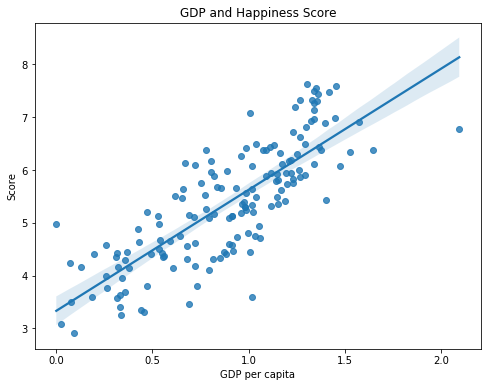

In [232]:
plt.figure(figsize=[8, 6])
sns.regplot(train['GDP per capita'], train['Score'])
plt.xlabel('GDP per capita')
plt.ylabel('Score')
plt.title('GDP and Happiness Score')
plt.show()

In [233]:
coef = stats.pearsonr(train['Freedom to make life choices'], train['Score'])
coef_freedom = coef[0]
print('The correlation coefficient between Freedom and Happiness Score is ' + str(coef_freedom))

The correlation coefficient between Freedom and Happiness Score is 0.5442799358332934


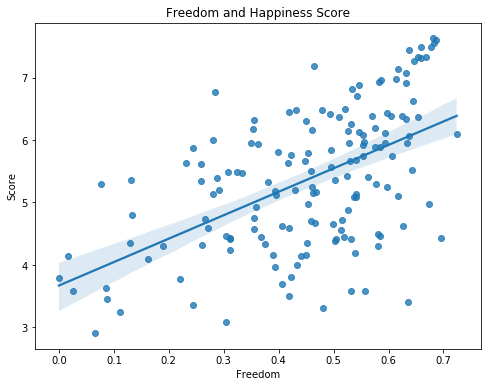

In [234]:
plt.figure(figsize=[8, 6])
sns.regplot(train['Freedom to make life choices'], train['Score'])
plt.xlabel('Freedom')
plt.ylabel('Score')
plt.title('Freedom and Happiness Score')
plt.show()

In [235]:
coef = stats.pearsonr(train['Social support'], train['Score'])
coef_social = coef[0]
print('The correlation coefficient between Social Support and Happiness Score is ' + str(coef_social))

The correlation coefficient between Social Support and Happiness Score is 0.7457601649725754


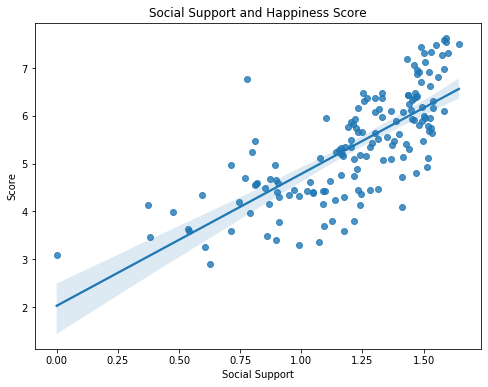

In [236]:
plt.figure(figsize=[8, 6])
sns.regplot(train['Social support'], train['Score'])
plt.xlabel('Social Support')
plt.ylabel('Score')
plt.title('Social Support and Happiness Score')
plt.show()

In [237]:
coef = stats.pearsonr(train['Healthy life expectancy'], train['Score'])
coef_health = coef[0]
print('The correlation coefficient between Healthy life expectancy and Happiness Score is ' + str(coef_health))

The correlation coefficient between Healthy life expectancy and Happiness Score is 0.7758136033302458


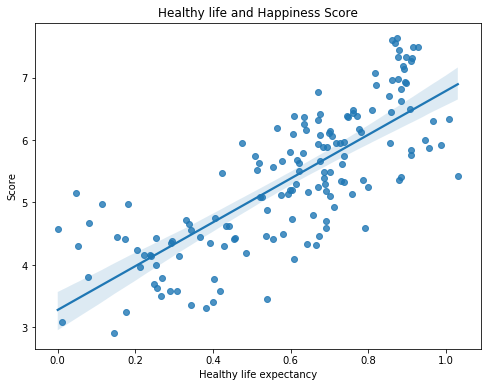

In [238]:
plt.figure(figsize=[8, 6])
sns.regplot(train['Healthy life expectancy'], train['Score'])
plt.xlabel('Healthy life expectancy')
plt.ylabel('Score')
plt.title('Healthy life and Happiness Score')
plt.show()

In [239]:
coef = stats.pearsonr(train['Generosity'], train['Score'])
coef_generoisity = coef[0]
print('The correlation coefficient between Generosity and Happiness Score is ' + str(coef_generoisity))

The correlation coefficient between Generosity and Happiness Score is 0.13582474708113768


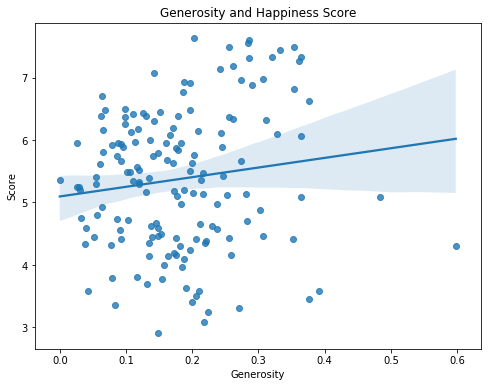

In [240]:
plt.figure(figsize=[8, 6])
sns.regplot(train['Generosity'], train['Score'])
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.title('Generosity and Happiness Score')
plt.show()

In [241]:
coef = stats.pearsonr(train['Perceptions of corruption'], train['Score'])
coef_corruption = coef[0]
print('The correlation coefficient between Perceptions of corruption and Happiness Score is ' + str(coef_corruption))

The correlation coefficient between Perceptions of corruption and Happiness Score is 0.4064320705947886


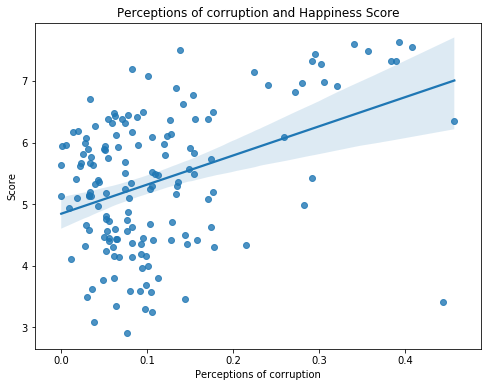

In [242]:
plt.figure(figsize=[8, 6])
sns.regplot(train['Perceptions of corruption'], train['Score'])
plt.xlabel('Perceptions of corruption')
plt.ylabel('Score')
plt.title('Perceptions of corruption and Happiness Score')
plt.show()

'GDP per capita', 'Healthy life expectancy', 'Freedom to make life choices', 'Social support' and 'Perceptions of corruption' all contribute to happiness. If I were the president of a country, I will try to improve GDP per capita, Healthy life expectancy, and Social support of citizens. 

In [243]:
reg = LinearRegression().fit(train[['GDP per capita', 'Social support',
                'Healthy life expectancy', 'Freedom to make life choices',
                'Generosity', 'Perceptions of corruption']],train['Score'])
test['predict'] = reg.predict(test[['GDP per capita', 'Social support',
                'Healthy life expectancy', 'Freedom to make life choices',
                'Generosity', 'Perceptions of corruption']])
test[['Score', 'predict']].sample(10)

,Score,predict
33,6.262,7.246345
26,6.436,5.536679
78,5.373,5.599684
119,4.516,4.315224
113,4.628,3.732519
65,5.693,6.218054
89,5.208,5.439062
142,3.933,3.892865
4,7.488,6.918778
48,6.046,6.041842


In [244]:
print('Mean sqaured error: ' + str(mean_squared_error(test['Score'], test['predict'])))

Mean sqaured error: 0.2760758783079982


In [245]:
reg.coef_

array([1.08713868, 1.01415649, 0.81830852, 1.36413137, 0.57088431,
       0.71190545])

In [246]:
reg.intercept_

1.8843017967242233

In [247]:
regr = RandomForestRegressor(max_depth=8, random_state=1)
regr.fit(train[['GDP per capita', 'Social support',
                'Healthy life expectancy', 'Freedom to make life choices',
                'Generosity', 'Perceptions of corruption']],train['Score']) 
test['predict'] = regr.predict(test[['GDP per capita', 'Social support',
                'Healthy life expectancy', 'Freedom to make life choices',
                'Generosity', 'Perceptions of corruption']])
test[['Country or region', 'Score', 'predict']].sample(10)

,Country or region,Score,predict
64,Peru,5.697,5.832268
44,Nicaragua,6.105,5.922837
152,Tanzania,3.231,4.448691
56,Mauritius,5.888,6.245111
30,Panama,6.321,6.156398
72,Montenegro,5.523,5.578983
37,Slovakia,6.198,6.266512
8,Canada,7.278,6.761847
1,Denmark,7.600,6.764664
23,France,6.592,6.196025


In [248]:
print('Mean sqaured error: ' + str(mean_squared_error(test['Score'], test['predict'])))

Mean sqaured error: 0.2399601901659083


In [249]:
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(train[['GDP per capita', 'Social support',
                'Healthy life expectancy', 'Freedom to make life choices',
                'Generosity', 'Perceptions of corruption']],train['Score']) 
test['predict'] = neigh.predict(test[['GDP per capita', 'Social support',
                'Healthy life expectancy', 'Freedom to make life choices',
                'Generosity', 'Perceptions of corruption']])
test[['Country or region', 'Score', 'predict']].sample(10)

,Country or region,Score,predict
154,Central African Republic,3.083,3.6120
27,Saudi Arabia,6.375,6.4060
74,Croatia,5.432,5.8185
79,Malaysia,5.339,5.7985
103,Gabon,4.799,4.9795
134,Swaziland,4.212,4.4815
123,Tunisia,4.461,4.4565
138,Togo,4.085,3.8155
30,Panama,6.321,6.0605
95,Cameroon,5.044,4.8160


In [250]:
print('Mean sqaured error: ' + str(mean_squared_error(test['Score'], test['predict'])))

Mean sqaured error: 0.16444264583333323


KNeighborsRegressor performed the best, RandomForestRegressor is second, and the LinearRegression is the third.

In [251]:
test['predict'] = (test['GDP per capita'] * 1.08713868 + test['Social support']
                * 1.01415649 + test['Healthy life expectancy'] * 0.81830852
                + test['Freedom to make life choices'] * 1.36413137 + test['Generosity']
                * 0.57088431 + test['Perceptions of corruption'] * 0.71190545 + 1.8843017967242233)
test[['Score', 'predict']]

,Score,predict
0,7.769,6.937533
1,7.600,7.041428
2,7.554,7.167622
3,7.494,6.963427
4,7.488,6.918778
...,...,...
151,3.334,4.671659
152,3.231,4.538701
153,3.203,3.192526
154,3.083,2.464494


In [252]:
print('Mean sqaured error: ' + str(mean_squared_error(test['Score'], test['predict'])))

Mean sqaured error: 0.27607587822210106
